In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [5]:
from pandas_datareader import DataReader

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = DataReader(stock,'yahoo',start,end)


In [7]:
AAPL.describe()


,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,193.247371,189.321155,191.241116,191.348805,3.264998e+07,189.756643
std,21.701362,21.437586,21.534626,21.557951,1.395660e+07,21.094416
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.039642
25%,175.934998,173.555000,174.805000,174.794998,2.329740e+07,174.024834
50%,191.919998,189.070007,190.029999,190.399994,2.974860e+07,188.461243
75%,210.089996,206.904999,208.610001,208.875000,3.876575e+07,206.743652
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [8]:
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-06-15 to 2019-06-14
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


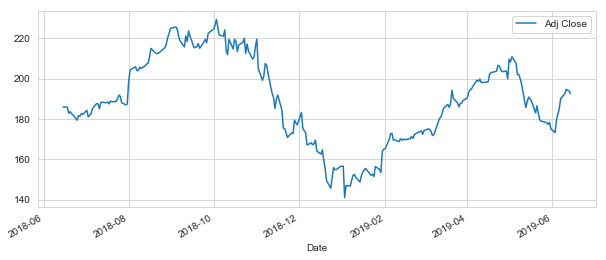

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))


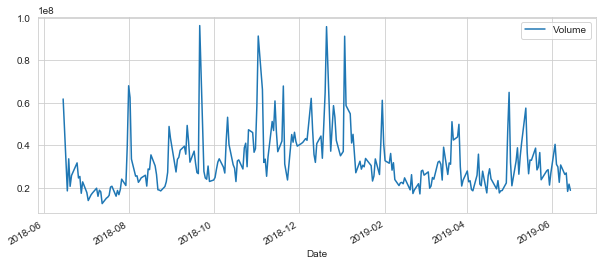

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))


In [12]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

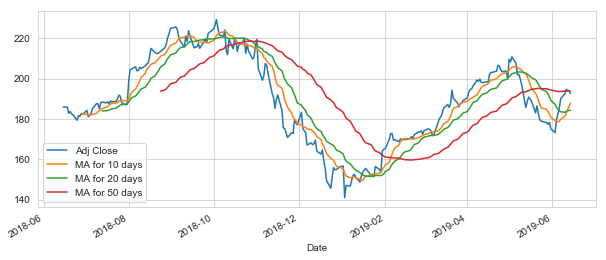

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))


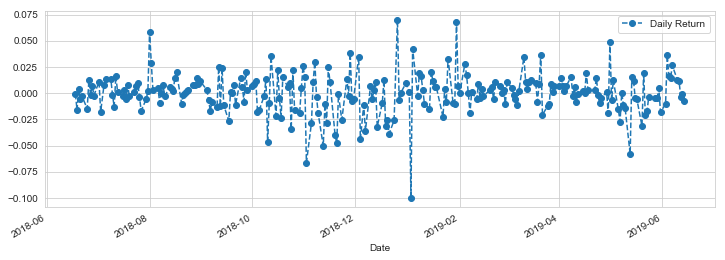

In [15]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')


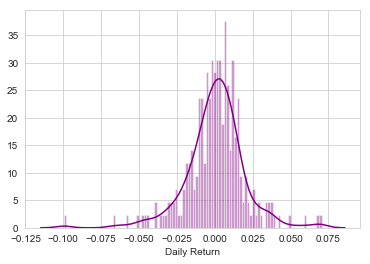

In [16]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [17]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']


In [18]:
closing_df.head()


Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-06-15,186.008575,1715.969971,1152.260010,98.530022
2018-06-18,185.910080,1723.790039,1173.459961,99.248360
2018-06-19,182.905807,1734.780029,1168.060059,99.248360
2018-06-20,183.703659,1750.079956,1169.839966,100.242218
2018-06-21,182.679245,1730.219971,1157.660034,99.523872


In [19]:
tech_rets = closing_df.pct_change()


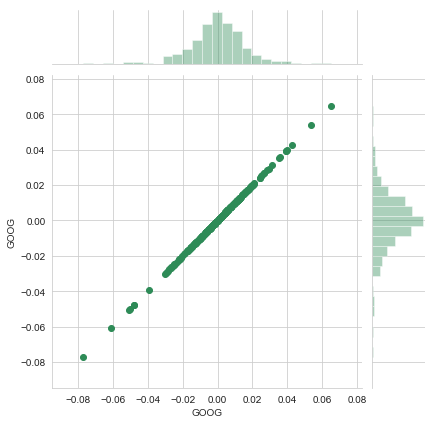

In [20]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')


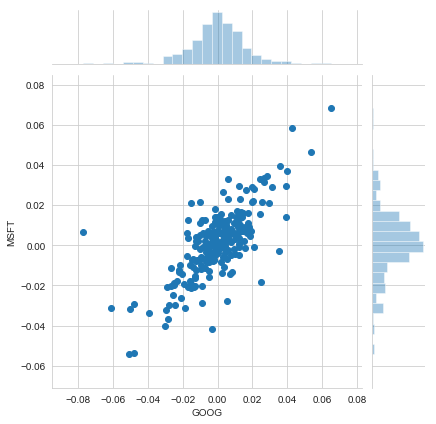

In [21]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')


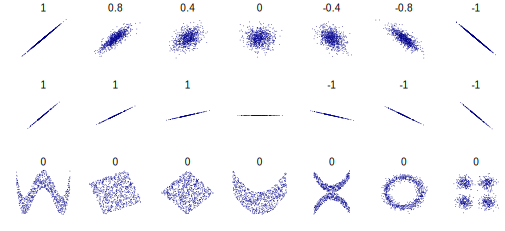

In [22]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')



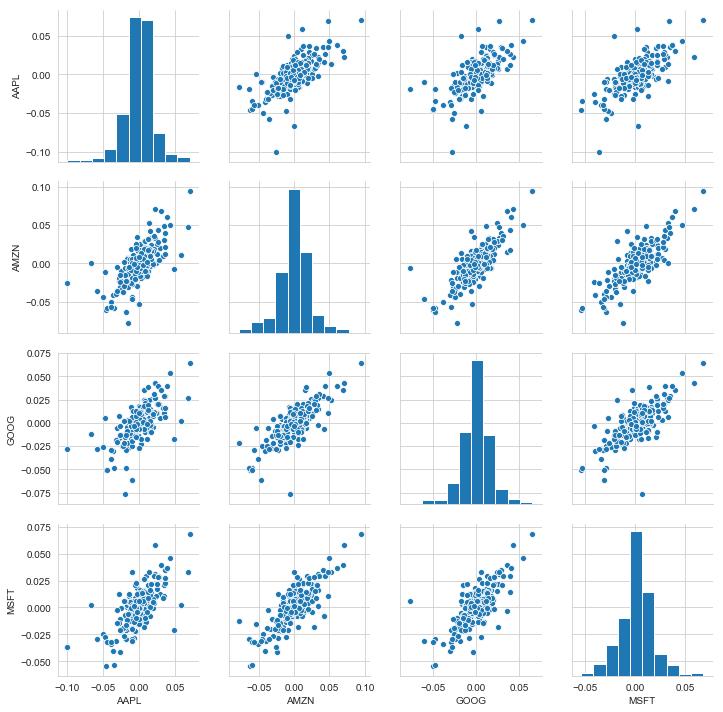

In [23]:
sns.pairplot(tech_rets.dropna())


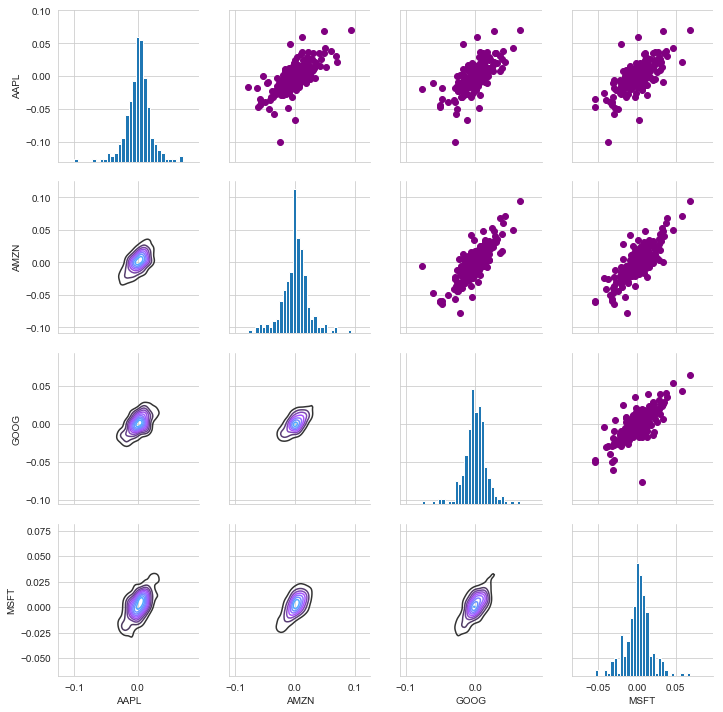

In [24]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


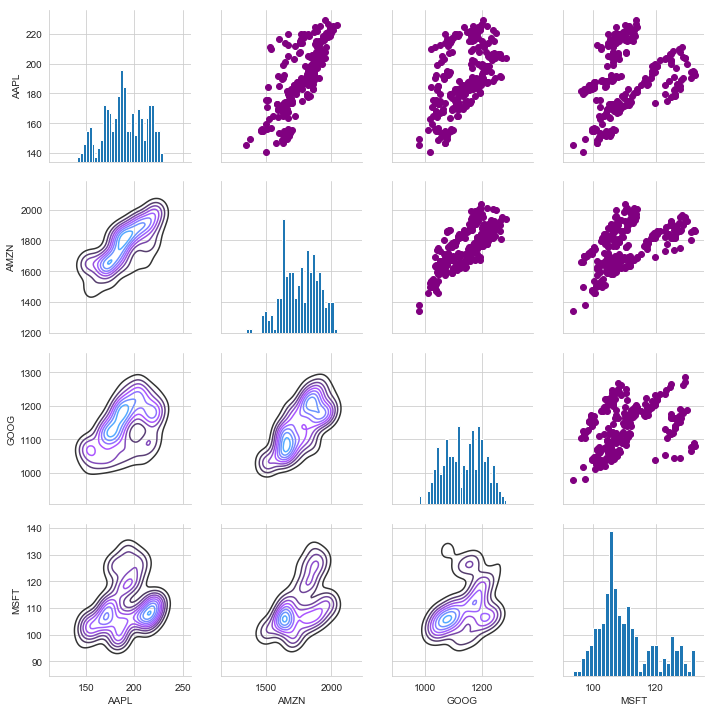

In [25]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


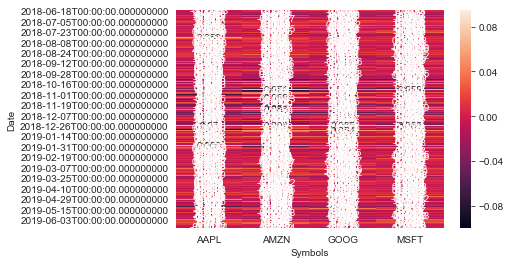

In [30]:
sns.heatmap(tech_rets.dropna(),annot=True)


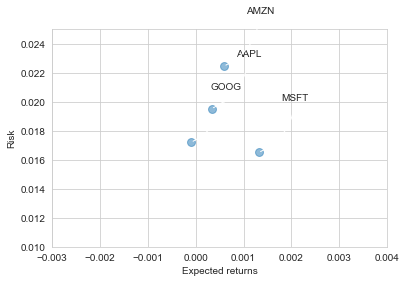

In [31]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


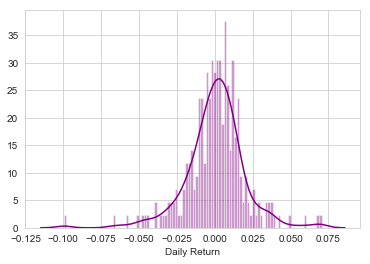

In [32]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [33]:
rets['AAPL'].quantile(0.05)


-0.0312346728634737

In [34]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']


In [37]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


Text(0.5,1,'Monte Carlo Analysis for Google')

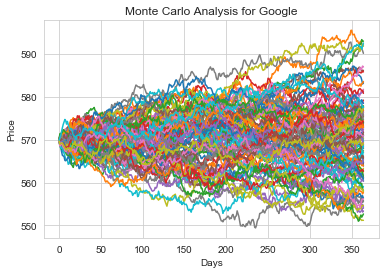

In [39]:
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')


In [41]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


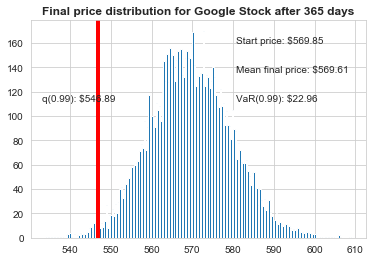

In [42]:
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');
